# Exercício 1: Usando gráficos para explorar

O objetivo deste Teste é determinar $\alpha$ tal que a equação

$$\sin(4x) = \alpha x + \log(x)$$

tenha exatamente 21 soluções reais.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Questão 1: A função

Como queremos variar $\alpha$, seria bom ter uma função `f` com dois argumentos ($\alpha$ e $x$) para calcular o lado direito.

In [2]:
def f(alpha,x):
    return alpha*x + log(x)

In [3]:
assert(f(1,1) == 1)
assert(f(2,1) == 2)
assert(f(1,2) == 2 + log(2))

## Questão 2: Primeiros gráficos

Queremos ter uma ideia de quantos zeros a equação pode ter em função de $\alpha$.
Para isso, faça o gráfico de $\sin(4x)$ e os gráficos de $f(\alpha,x)$ para alguns valores de $\alpha$.

Não esqueça a legenda!

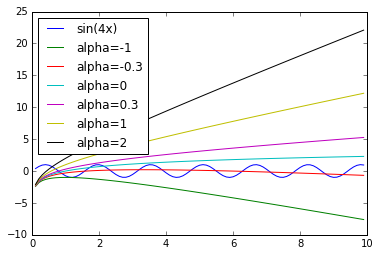

In [4]:
x = arange(0.1,10,0.1)
alphas = [-1,-0.3,0,0.3,1,2]

plot(x, sin(4*x), label='sin(4x)')

for alpha in alphas: 
    plot(x, f(alpha,x), label='alpha={}'.format(alpha));

legend(loc=0);

Observando este gráfico, qual parece ser o maior valor possível de zeros para a equação? Qual o menor valor? Porquê?

Para $\alpha = -1$ parece haver um único zero, para algum $-0.3 \lt \alpha \lt 0$ parece ser possível que haja uma quantidade arbitrariamente grande de zeros.

Concluo isso verificando onde a curva de $sin(4x)$ intersecta a curva do $\alpha$ verificado.

## Questão 3: Zooms decentes

Fazer os gráficos com diferentes $f(\alpha,x)$ no mesmo eixo é ruim.
Use os mesmos valores, mas agora faça um gráfico para cada valor de $\alpha$, com o tamanho do eixo $x$ adaptado.

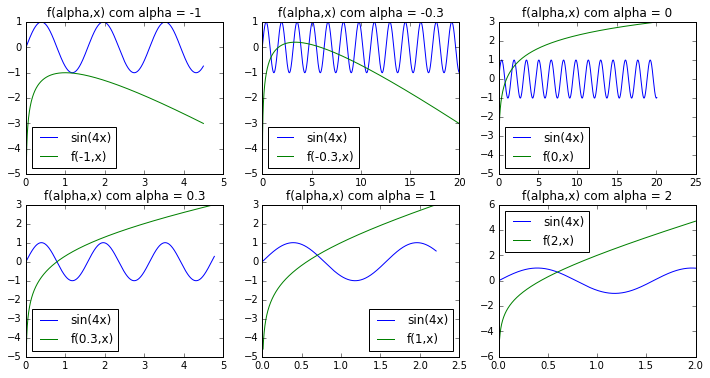

In [5]:
alphas = [-1,-0.3,0,0.3,1,2]

figure(figsize=(12,6))

raw_l_x = arange(1e-2,25,1e-3)
epsilon = 3

for i,alpha in enumerate(alphas):
    subplot(2,3,i+1)
    
    l_x = [x for x in raw_l_x if x < 2 or abs(f(alpha,x)) < epsilon]
    l_x = array(l_x)
    
    plot(l_x, sin(4*l_x), label='sin(4x)')
    plot(l_x, f(alpha,l_x), label='f({},x)'.format(alpha));
    legend(loc=0)
    
    title("f(alpha,x) com alpha = {}".format(alpha))

Se $\alpha$ é positivo, quantas raizes no mínimo tem o sistema? Quantas no máximo?

Mínimo de uma única raíz, máximo de três. Pode-se obter três raízes quando $\alpha \rightarrow 0^+$.

## Questão 4: Nenhum zero

A equação pode não ter nenhum zero. Dê um valor de $\alpha$ para que isso aconteça, e mostre (com um gráfico) porque.

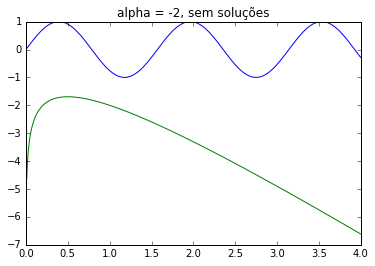

In [6]:
alpha = -2
x = arange(1e-2,4,1e-3)

plot(x, sin(4*x))
plot(x, f(alpha,x))
title('alpha = {}, sem soluções'.format(alpha));

## Questão 5: Limite de $\alpha$

Existe um valor de $\alpha$ tal que a equação tem apenas uma raiz dupla.
Escreva o sistema de equações que o par $(\alpha, x_\alpha)$ satisfaz, onde $x_\alpha$ é a raiz dupla.

Explique como você obteve este sistema.

$\begin{cases} \alpha{x_\alpha} + log(x_\alpha) - sin(4x_\alpha) = 0 \\
\\
\alpha + \displaystyle \frac{1}{x_\alpha} - 4cos(4x_\alpha) = 0 \end{cases}$

Uma raíz dupla é um ponto em que uma curva tangencia a outra. Isso significa que o valor das coordenadas das duas curvas no ponto é o mesmo, assim como a inclinação das curvas (derivada) naquele ponto. A partir disso tenho o sistema:

$\begin{cases} sin(4x) = \alpha{x} + log(x) \\
\\
4cos(4x) = \alpha + \displaystyle \frac{1}{x} \end{cases}$

Daí para a resposta dada é só trocar o $x$ por $x_\alpha$.

Elimine $\alpha$ das equações e obtenha uma única equação em $x$

$4x_\alpha{cos(4x_\alpha)} - sin(4x_\alpha) + log(x_\alpha) - 1 = 0$

Use algum método numérico para encontrar o valor de $x$.
O seu valor inicial pode (deve!) ser sugerido pelos gráficos acima.

In [7]:
def bissecao(g,a,b,prec):
    m = (a+b)/2
    
    if g(m) == 0: return m
    if abs(b-a) < prec: return m
    
    if g(a)*g(m) < 0: return bissecao(g,a,m,prec)
    else: return bissecao(g,m,b,prec)

bissecao(lambda x: x**2 - 2,1,2,1e-15)

1.4142135623730954

In [8]:
def x_f(x):
    return 4*x*cos(4*x) - sin(4*x) + log(x) - 1

x = bissecao(x_f, 1e-5, 2, 1e-15)

x

1.1697482271707988

Agora, determine o valor de $\alpha$ em função de $x$.

In [9]:
def alpha_x(x):
    return 4*cos(4*x) - 1/x

alpha = alpha_x(x)

alpha

-0.98844427490290732

A verificação de que a raiz é dupla é mais sutil ;-)

Primeiro, vemos que estamos de fato perto do zero.
Se este teste falhar, mas você estiver perto do zero, talvez precise de mais precisão em $x$ ou $\alpha$...

In [10]:
assert( abs(f(alpha, x) - sin(4*x)) < 1e-14 )

Em seguida, vemos que ambos os lados da função são positivos ou negativos, o que garante que é uma raiz dupla.

In [11]:
eps = 1e-13
f_prev = f(alpha, x-eps) - sin(4*(x-eps))
f_next = f(alpha, x+eps) - sin(4*(x+eps))
assert( f_prev * f_next > 0 )

## Questão 6: Muitas raízes

Se $\alpha$ for negativo, pode haver várias raízes do sistema.

Encontre (graficamente) um valor de $\alpha$ tal que o sistema tenha 20 raízes.

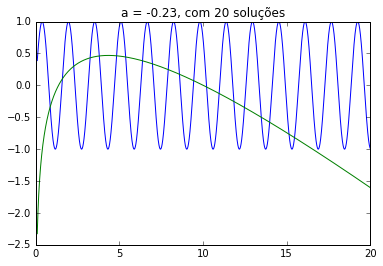

In [12]:
x = arange(1e-1,20,1e-3)
alpha = -0.23

plot(x, sin(4*x))
plot(x, f(alpha,x))
title('a = {}, com 20 soluções'.format(alpha));

## Questão 7: Um pouco mais de raízes

Modifique o que foi feito nas questões 5 e 6 para encontrar o (único) valor de $\alpha$ tal que o sistema tenha 21 raízes.

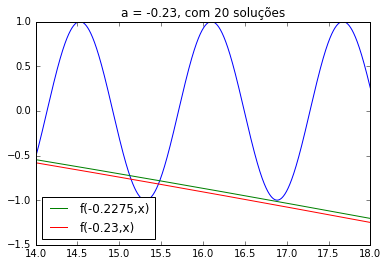

In [13]:
# Você pode usar esta caixa para fazer mais contas se quiser

#x = arange(15,18,1e-3)
x = arange(14,18,1e-3)

plot(x, sin(4*x))

a2=-0.2275
plot(x, f(a2,x), label='f({},x)'.format(a2))
plot(x, f(alpha,x), label='f({},x)'.format(alpha))

legend(loc=0)

title('a = {}, com 20 soluções'.format(alpha));

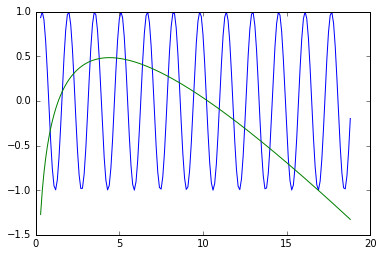

In [14]:
# Você pode usar esta caixa para fazer mais contas se quiser

x = bissecao(x_f,16.5,17.5,1e-8)
alpha = alpha_x(x)

x_l = arange(3e-1,x+2,1e-1)
plot(x_l,sin(4*x_l))
plot(x_l,f(alpha,x_l))

Na caixa abaixo, dê os valores de $x$ e $\alpha$ que são a 21a raiz dupla.

In [15]:
x = bissecao(x_f,16.5,17.5,1e-14)
alpha = alpha_x(x)

x, alpha

(16.875594890618043, -0.22665822494798649)

In [16]:
assert( abs(f(alpha, x) - sin(4*x)) < 1e-12 )

eps=1e-10
f_prev = f(alpha, x-eps) - sin(4*(x-eps))
f_next = f(alpha, x+eps) - sin(4*(x+eps))
assert( f_prev * f_next > 0 )

As duas caixas abaixo (apagadas) testam que de fato o seu sistema só tem 21 soluções, com um método muito engenhoso

Como você faria para determinar todos os valores de $\alpha$ tais que o sistema tem exatamente 20 soluções?

De posse das equações:

$(1): 4x_\alpha{cos(4x_\alpha)} - sin(4x_\alpha) + log(x_\alpha) - 1 = 0;$ e

$(2): \alpha = 4cos(4x) - \displaystyle \frac{1}{x}$

* Uso o método da bisseção em $(1)$ para descobrir o valor $x_1$, tal que $15.0 \lt x_1 \lt 16.0$; esse é o valor onde a curva $f(\alpha,x)$ tangencia $sin(4x)$ de modo a ter 19 raízes

    * A partir de $x_1$, uso $(2)$ para descobrir o $\alpha_1$ associado

* Uso $(1)$ novamente para procurar $x_2$ tal que $16.5 \lt x_2 \lt 17.5$; esse valor é onde a equação inicial desse Teste passa a ter 21 raízes

    * A partir de $x_2$ uso $(2)$ para descobrir $\alpha_2$

* A equação inicial vai ter exatamente 20 raízes para todo $\alpha$, tal que $\alpha_2 \lt \alpha \lt \alpha_1$

Os valores numéricos tem a ver com a curva descrita por $sin(4x)$ e os pontos onde $\alpha{x} + log(x)$ pode cortá-la ou tangenciá-la. De posse dessas informações é bem fácil "contar" as raízes.